# 1. Judul Topik : Prediksi Harga Rumah Dengan Metode Regresi Linear

---







NAMA : Yova Febrian Pradita

---



NIM : A11.2022.14095


---


Mata Kuliah : Pembelajaran Mesin

---


Kelompok : A11.4410


#2.Ringkasan dan Permasalahan

---

####Pada era sekarang masih sering orang yang ingin mempunyai atau membeli rumah, sering kesulitan dalam menentukan kisaran budget yang diperlukan dalam pemilihan rumah dan interior didalamnya seperti jumlah kamar mandi, kamar tidur, luas bangunan, luas tanah. Salah satu metode yang digunakan untuk memprediksi harga rumah yaitu menggunakan Regresi Linear karena kesederhanaanya dan sangat efisien.

####Permasalahan Utama yang dihadapi adalah pengelompokan data rumah sesuai dengan harga dan fitur fitur yang ada dalam rumah untuk meningkatkan keakurasian/ketepatan dalam memprediksi

# Tujuan Akhir

---
##### tujuan akhir dalam project prediksi harga rumah ini adalah :


*   Memprediksi harga rumah dengan fitur fitur yang diinginkan
*   Mempermudah pembeli dalam menentukan harga

# Alur Penyelesaian

---






##  Import Library

# 3. Penjelasan Dataset

---
Dalam melakukan pemrosesan data kita perlu memahami dataset yang sedang dan akan kita gunakan, untuk dataset yang digunakan disini adalah dataset segmentation data.csv yang mana di dalam dataset tersebut ada beberapa fitur-fitur yang telah disimbolkan dengan angka, berikut penjelasannya :

*   HARGA : Berfungsi unutuk menentukan harga Rumah
*   LB : Berfungis untuk Luas Bangunan
*   LT : Berfungsi untuk Luas Tanah
*   KT : Berfungsi untuk mengetahui jumlah Kamar Tidur yang ada dalam rumah
*   KM : Berfungsi untuk mengetahui jumlah Kamar Mandi  yang ada dalam rumah
*   GRS : Berfungis untuk mengetahui berapa mobil yang cukup didalam garasi






#Proses EDA dan Fiture Dataset

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

Dalam proyek "Prediksi Harga Rumah dengan Metode Regresi Linear," kita butuh  library yang digunakan untuk mendukung seluruh proses analisis data dan pembangunan model. Matplotlib (matplotlib.pyplot) dan Seaborn (seaborn) digunakan untuk membuat visualisasi data yang membantu dalam memahami distribusi dan hubungan antar variabel. Pandas (pandas) berperan dalam manipulasi dan analisis data dengan menyediakan struktur data seperti DataFrame. Pylab (pylab) dan Numpy (numpy) digunakan untuk komputasi numerik dan manipulasi array, memungkinkan operasi matematika yang efisien. Scikit-learn (sklearn) menyediakan alat untuk membangun dan mengevaluasi model regresi linear serta membagi dataset menjadi set pelatihan dan pengujian. Magic command %matplotlib inline memastikan plot ditampilkan langsung di dalam Jupyter Notebook. Terakhir, library warnings digunakan untuk mengelola peringatan, menjaga output yang bersih dan fokus pada hasil utama.

In [ ]:
df = pd.read_csv('DATA RUMAH BARU.csv')

In [ ]:
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


**Pengunduhan DataSet**
 menggunakan kaggle https://www.kaggle.com/datasets/wisnuanggara/daftar-harga-rumah

In [ ]:
filecsv="DATA RUMAH BARU.csv"
df = pd.read_csv(filecsv,usecols=['HARGA','LB','LT','KT','KM','GRS'])
df.head()

,HARGA,LB,LT,KT,KM,GRS
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3


In [ ]:
df.shape

(1010, 6)

Pada code datas kita dapat mengetahui jumlah kolom dan baris data, diatas terlihat pada dataset mempunyai 6 kolom dan 1010 baris data

**Penjelasan Kolom**


*   HARGA = Harga Rumah
*   LB = Luas Bangunan
*   LT = Luas Tanah
*   KT = Jumlah Kamar Tidur
*   KM = Jumlah Kamar Mandi
*   GRS = Jumlah kapasitas mobil dalam garasi







In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   HARGA   1010 non-null   int64
 1   LB      1010 non-null   int64
 2   LT      1010 non-null   int64
 3   KT      1010 non-null   int64
 4   KM      1010 non-null   int64
 5   GRS     1010 non-null   int64
dtypes: int64(6)
memory usage: 47.5 KB


code diatas berguna unutuk mengetahui informasi dari data yang kita punya mulai dari tipe data, memori yang digunakan dll

In [ ]:
df.describe()

,HARGA,LB,LT,KT,KM,GRS
count,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


In [ ]:
df = pd.read_csv('DATA RUMAH BARU.csv')

In [ ]:
print("jumlah missing value perkolom:")
print (df.isnull().sum())

jumlah missing value perkolom:
NO            0
NAMA RUMAH    0
HARGA         0
LB            0
LT            0
KT            0
KM            0
GRS           0
dtype: int64


Code diatas bertujan unutuk mencari missing value dengan menggunakan fungsi isnull, jadi ketika terdapat data yang kosong maka akan dihitung,
tetapi pada data diatas tidak terdapat missing value

In [ ]:
# Persentase missing value
print("\nPersentase missing value per kolom:")
print(df.isnull().sum() / len(df) * 100)


Persentase missing value per kolom:
NO            0.0
NAMA RUMAH    0.0
HARGA         0.0
LB            0.0
LT            0.0
KT            0.0
KM            0.0
GRS           0.0
dtype: float64


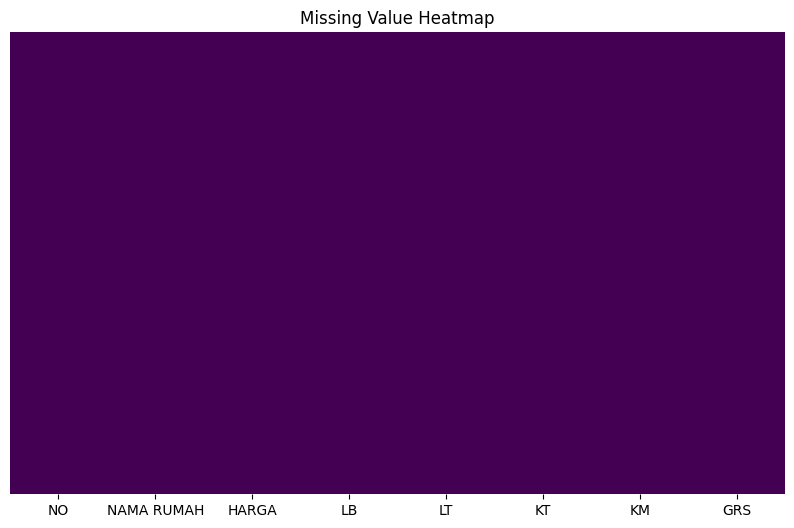

In [ ]:
#Visualisasi missing value
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

## EDA

**EKSPLORASI DATA**

In [ ]:
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


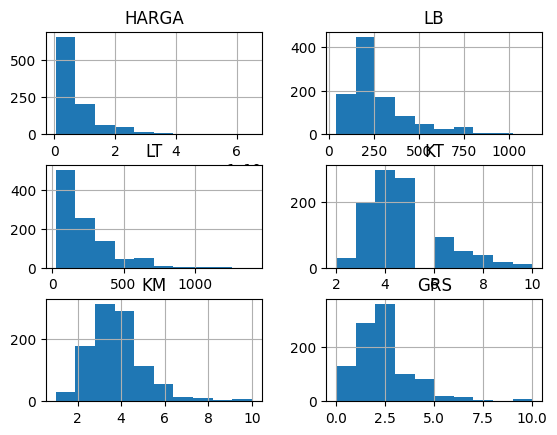

In [ ]:
viz = df[['HARGA','LB','LT','KT','KM','GRS']]
viz.hist()
plt.show()

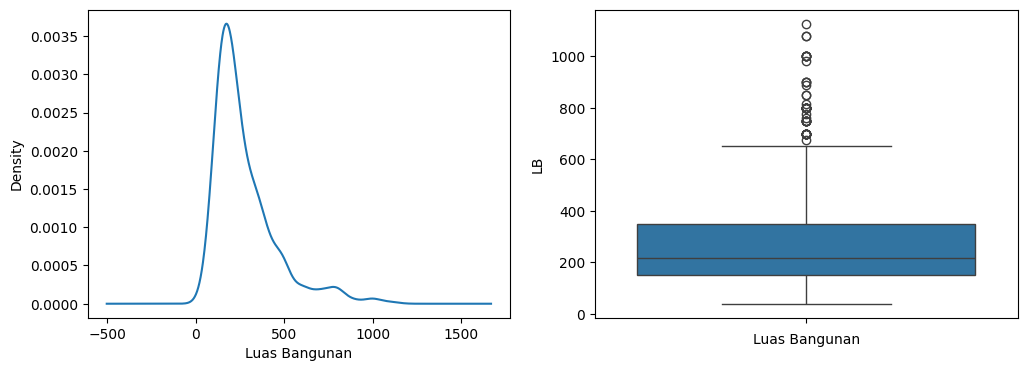

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['LB'].plot(kind='kde')
plt.xlabel("Luas Bangunan")

f.add_subplot(1,2,2)
sns.boxplot(df['LB'])
plt.xlabel("Luas Bangunan")

plt.show()

Pada Grafik diatas kita bisa melihat bahwa Luas Bagunan sebagian besar
berada pada kisaran 2000, dan kita bisa melihat beberapa kisaran data yang outlayer yaitu data yang terpaut jauh dari data lainya

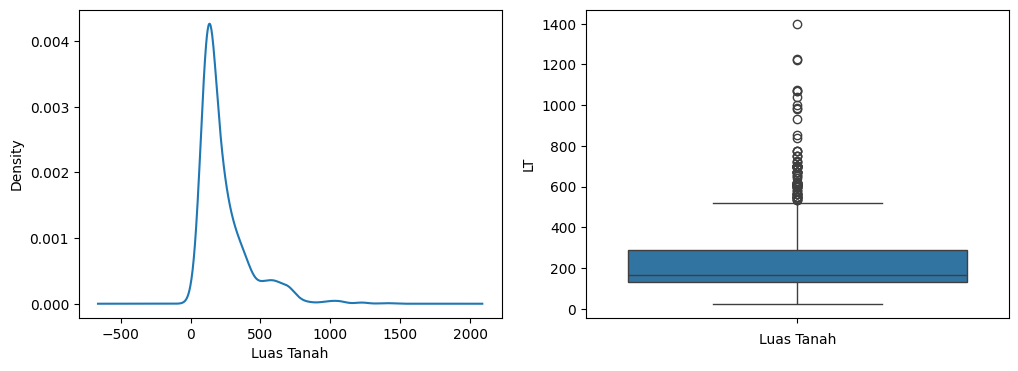

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['LT'].plot(kind='kde')
plt.xlabel("Luas Tanah")

f.add_subplot(1,2,2)
sns.boxplot(df['LT'])
plt.xlabel("Luas Tanah")

plt.show()

Pada Luas Tanah saya masih menggunakan jenis  
plot yang sama yaitu "kde"
dan kita bisa melihat untuk Luas Tanah sebagian besar pada kisaran
200

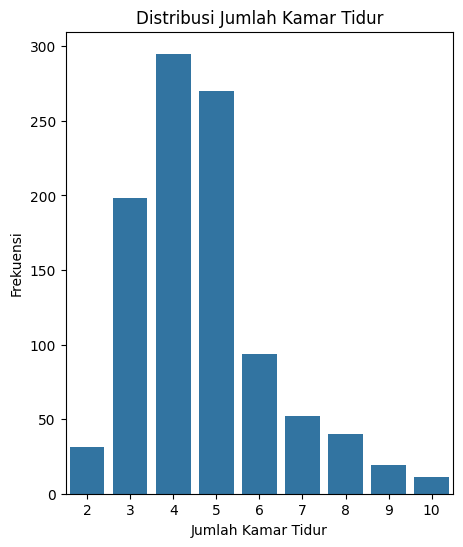

In [ ]:
f = plt.figure(figsize=(5,6))

sns.countplot(x=df['KT'])
plt.title('Distribusi Jumlah Kamar Tidur')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Frekuensi')
plt.show()


Untuk Jumlah Kamar tidur ini menggunakan jenis "countplot"
yang bagaimana countplot dapat menampilkan data dalam bentuk grafik batang.

---
Pada grafik batang diatas kita dapat melhat bahwa Kamar Tidur didominasi dengan jumlah 4 dan 5 kamar tidur


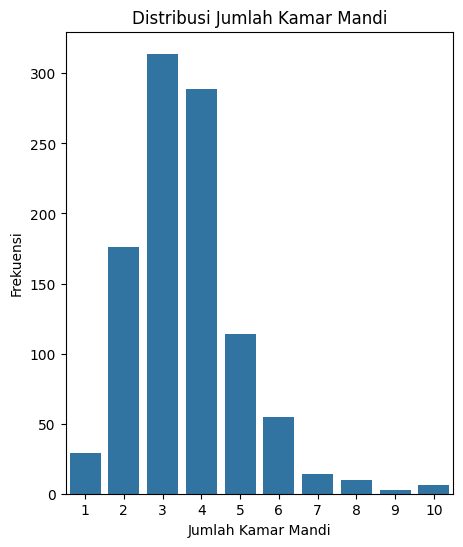

In [ ]:
f = plt.figure(figsize=(5,6))

sns.countplot(x=df['KM'])
plt.title('Distribusi Jumlah Kamar Mandi')
plt.xlabel('Jumlah Kamar Mandi')
plt.ylabel('Frekuensi')
plt.show()

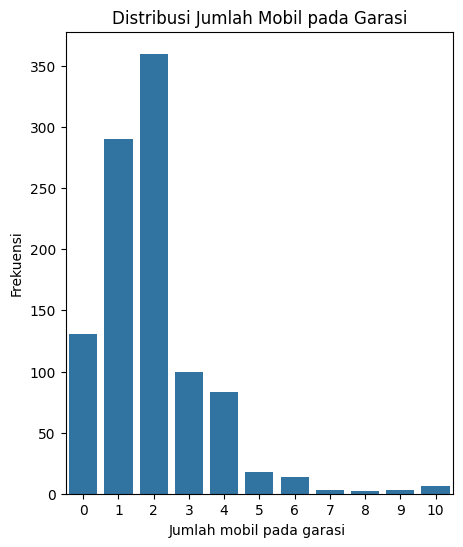

In [ ]:
f = plt.figure(figsize=(5,6))

sns.countplot(x=df['GRS'])
plt.title('Distribusi Jumlah Mobil pada Garasi')
plt.xlabel('Jumlah mobil pada garasi ')
plt.ylabel('Frekuensi')
plt.show()

Terlihat pada grafik ini kita bisa melihat bahwa jumlah mobil yang muat dalam garasi yaitu pada 1 mobil dan 2 mobil yang muat dalam garasi pada kisaran 360 data dan 280

<Figure size 1000x800 with 0 Axes>

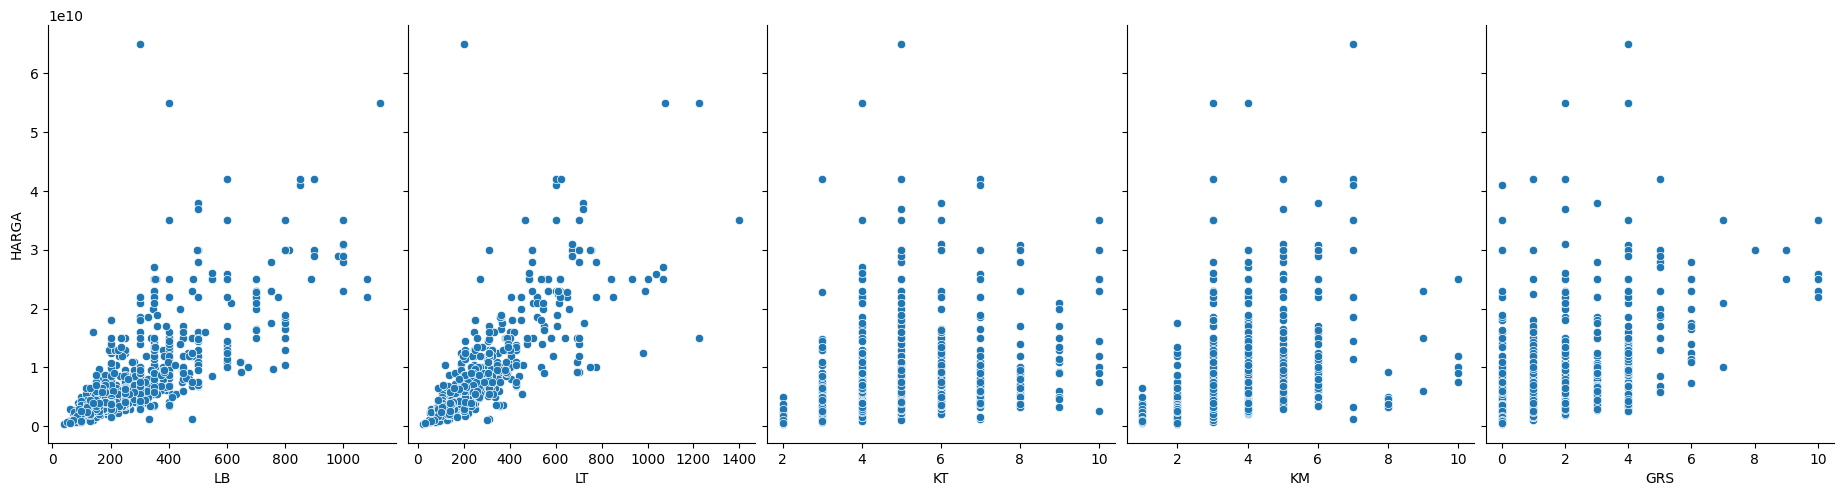

In [ ]:
f = plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['LB','LT','KT','KM','GRS'], y_vars=['HARGA'], size=5, aspect=0.75)
plt.show()

Kode tersebut membuat visualisasi matriks scatter plot menggunakan sns.pairplot untuk menunjukkan hubungan antara variabel-variabel ['LB', 'LT', 'KT', 'KM', 'GRS'] dengan variabel target 'HARGA' dalam DataFrame df. Dengan ukuran gambar diatur menjadi 10x8 inci dan rasio aspek subplot ditetapkan ke 0.75, pairplot ini menampilkan scatter plots dari setiap kombinasi variabel x dengan variabel y yang ditentukan. Tujuan utama dari visualisasi ini adalah untuk mengeksplorasi pola dan hubungan potensial antara variabel-variabel independen dan dependen secara bersamaan.

---

Pada korelasi datas dapat terlihat bahwa korelasi dalam bentuk positif.



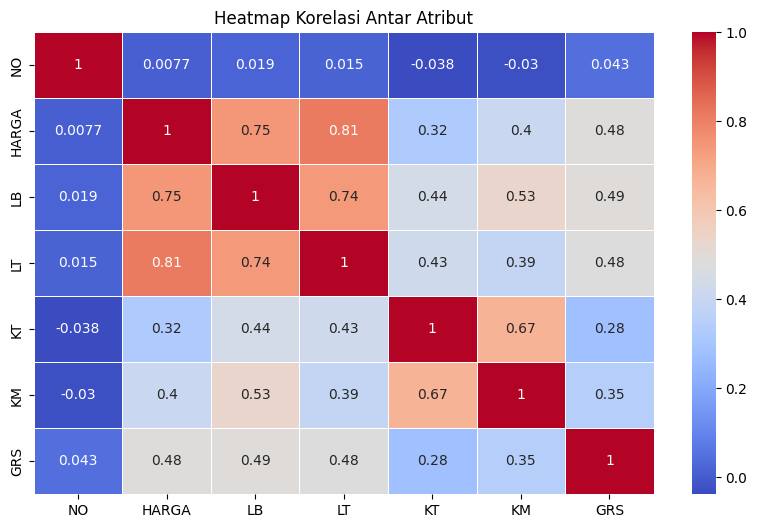

In [ ]:
 # Read the CSV file into a DataFrame
df = pd.read_csv('DATA RUMAH BARU.csv')

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix on the numeric DataFrame
corr_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Atribut')
plt.show()


  code di atas digunakan untuk membuat heatmap yang menggambarkan matriks korelasi antar atribut numerik dalam DataFrame df. Pertama, kolom-kolom numerik dipilih dari df menggunakan select_dtypes, kemudian matriks korelasi dihitung dengan metode .corr() untuk melihat hubungan linier antara setiap pasangan atribut numerik. Heatmap dibuat menggunakan sns.heatmap, yang menampilkan nilai korelasi di setiap sel dengan palet warna 'coolwarm', di mana warna biru menunjukkan korelasi negatif dan merah menunjukkan korelasi positif. Garis tipis ditambahkan di antara sel untuk meningkatkan keterbacaan. Dengan ukuran gambar 10x6 inci dan judul yang relevan, heatmap ini memungkinkan visualisasi cepat dan jelas dari hubungan antar atribut numerik dalam dataset.

---

Setelah menganalisis heatmap diatas kita tau bahawa semuanya mempunyai korelasinya  masing masing yang mana yang sangat berpengaruh pada harga rumah yaitu dipengaruhi oleh Luas Tanah, yang mana mencapai 0,81 yang jika dibuat dalam persen yaitu 80%. Jadi yang mempunyai pegahru harga rumah yaitu Luas Tanah dan Luas Bangunan.

# 4. Proses Learning/Modeling


In [ ]:
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


Pembuatan Dataset training dan testing

In [ ]:
x = df[['LB','LT','KT','KM','GRS']]
y = df['HARGA']

Membuat variabel X dan Y  untuk memisahkan fitur.
x = df[['LB','LT','KT','KM','GRS']]:

Memilih kolom-kolom 'LB', 'LT', 'KT', 'KM', dan 'GRS' dari DataFrame df dan menyimpannya dalam variabel x. Variabel x berisi fitur-fitur atau atribut yang akan digunakan sebagai input untuk model.
y = df['HARGA']:

Memilih kolom 'HARGA' dari DataFrame df dan menyimpannya dalam variabel y. Variabel y berisi target atau variabel yang ingin diprediksi oleh model.
Dengan memisahkan fitur dan target seperti ini, kita mempersiapkan data untuk pelatihan model pembelajaran mesin, di mana x akan digunakan sebagai input dan y sebagai output yang ingin diprediksi.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Code diatas yaitu bertujuan unutuk membuat data training dan testing, lalu kita split data kita menjadi training dan testing dengan perbandingan 80 untuk data training dan 20 untuk data testing

In [ ]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(808, 5)
(202, 5)
(808,)
(202,)


## Modelling

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train,y_train)

LinearRegression()

Dengan menjalankan lin_reg.fit(X_train, y_train), model regresi linier (lin_reg) akan belajar dari data pelatihan dan menyesuaikan parameter model (koefisien dan intersep) untuk meminimalkan kesalahan prediksi antara nilai yang diprediksi dan nilai sebenarnya dalam y_train. Ini adalah langkah penting dalam proses pelatihan model untuk mempersiapkannya membuat prediksi pada data baru.

In [ ]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 1.22852541e+07  2.32681420e+07 -6.38754626e+08  5.56618859e+08
  2.47983448e+08]
-775923911.9377832


untuk perintah print(lin_reg.coef_):
- Menampilkan koefisien regresi linier untuk setiap fitur dalam model. Koefisien ini menunjukkan seberapa besar pengaruh setiap fitur terhadap variabel target. Dalam regresi linier, setiap koefisien menggambarkan perubahan rata-rata dalam nilai target (y) untuk setiap unit perubahan dalam fitur (X), dengan asumsi fitur lain tetap konstan.

perintah print(lin_reg.intercept_):
- Menampilkan intersep (atau bias) dari model regresi linier. Intersep adalah nilai prediksi dari variabel target (y) ketika semua fitur (X) bernilai nol. Ini adalah titik potong pada sumbu y dari garis regresi dalam model regresi linier.

---

- Sehingga kita dapat nilai koefisienya terdapat 5 kolom yaitu LB,LT,KT,KM,GRS.
- intercept yaitu HARGA

In [ ]:
coef_dict = {
    'features': x.columns,
    'coef_value' : lin_reg.coef_
}

coef = pd.DataFrame(coef_dict, columns=['feature','coef_value'])
coef

,feature,coef_value
0,NaN,1.228525e+07
1,NaN,2.326814e+07
2,NaN,-6.387546e+08
3,NaN,5.566189e+08
4,NaN,2.479834e+08


# 5. Uji Performa Model

In [ ]:
y_pred = lin_reg.predict(X_test)
lin_reg.score(X_test,y_test)

0.7713134894077545

Untuk proses Performa Model disini saya menggunakan :
y_pred = lin_reg.predict(X_test):
- Menggunakan model regresi linier yang telah dilatih (lin_reg) untuk membuat prediksi berdasarkan data fitur pada X_test. Hasil prediksi ini disimpan dalam variabel y_pred, yang berisi nilai-nilai yang diprediksi oleh model untuk data uji.

lin_reg.score(X_test, y_test):
-  untuk mengevaluasi seberapa baik model regresi linier yang telah dibuat dapat memprediksi hasil pada data yang belum dilihat sebelumnya. Skor ini, yang disebut
𝑅
2
R
2
 , memberikan gambaran tentang seberapa akurat model dalam menjelaskan variasi atau perbedaan dalam data yang kita coba prediksi. Nilai
𝑅
2
R
2
  berkisar antara 0 hingga 1; semakin mendekati 1, semakin baik model dalam memprediksi hasil yang diinginkan, sedangkan semakin mendekati 0, semakin buruk model dalam menjelaskan hasil tersebut.

---
kemudian kita mendapat mempunyai presentase akurasi scor sebesar 77%


## Model Evaluation

In [ ]:
lin_reg.predict([[400,250,4,4,4]])

array([1.06186039e+10])

# 6. Penjelasan Hasil Akhir dan Kesimpulan

---

## Penjelasan Hasil Akhir


1.   **Pembagian Data**: Data dibagi menjadi dua bagian, yaitu data latih (training data) dan data uji (testing data).
2.   **Pelatihan Model**: Model regresi linear dilatih menggunakan data latih.
3.  **Prediksi**: Model yang telah dilatih kemudian digunakan untuk memprediksi harga rumah berdasarkan data uji.
4.   **Evaluasi Model**: Evaluasi dilakukan dengan menghitung skor
𝑅
2
R
2
  dari model pada data uji. Dalam project ini, model memiliki presentase akurasi sebesar 77%.

---

Selain itu, model juga digunakan untuk memprediksi harga rumah dengan kriteria tertentu:

*   Luas Bangunan: 400 m²
*   Luas Tanah : 250
*   Jumlah Kamar Mandi: 4
*   Jumlah Kamar Mandi: 4
*   Kapasitas Garasi: 4 mobil

Prediksi harga rumah berdasarkan kriteria di atas adalah sekitar Rp10.618.603.900






# Kesimpulan

---


1.  **Model Regresi Linear**: Metode regresi linear yang digunakan cukup efektif dalam memprediksi harga rumah, dengan akurasi model sebesar 77%. Ini menunjukkan bahwa model dapat menjelaskan variasi dalam data yang cukup baik.
2.   **Faktor Penentu Harga Rumah**: Faktor-faktor seperti luas bangunan, luas tanah, Luas Garasi , jumlah kamar tidur, jumlah kamar mandi, dan Luas Tanah dan Luas Bangunan  memiliki pengaruh signifikan terhadap harga rumah.
3.   **Praktik Penerapan:** Model ini dapat digunakan oleh agen real estate atau calon pembeli rumah untuk memperkirakan harga rumah berdasarkan karakteristik yang dimiliki rumah tersebut.
4.   **Pengembangan Lebih Lanjut:** Akurasi model bisa ditingkatkan dengan menambahkan lebih banyak fitur yang relevan, seperti lokasi, tahun bangunan, dan kondisi rumah. Selain itu, penggunaan metode machine learning yang lebih kompleks juga bisa dipertimbangkan untuk meningkatkan performa prediksi.






